<a href="https://colab.research.google.com/github/smgyl/246/blob/main/246_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np


import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, plot_roc_curve
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense


Mounted at /content/drive


In [4]:
import os
os.chdir('drive/Shareddrives/MS&E 246')

In [6]:
data = pd.read_csv("PreprocessedDset.csv",low_memory = False)
print(data.columns)
final_data = data

Index(['Unnamed: 0', 'BorrState', 'GrossApproval', 'TermInMonths',
       'ProjectState', 'GrossChargeOffAmount', 'GDPBS', 'TOPIsBS', 'CompBS',
       'SubBS',
       ...
       'norm_PCEPS', 'norm_perPCEPS', 'norm_EMPS', 'norm_wsEMPS', 'norm_PIPS',
       'norm_wsPS', 'norm_ProIPS', 'norm_FIPS', 'norm_PTPS', 'norm_perPIPS'],
      dtype='object', length=135)


In [7]:
missing_macro = final_data.columns[final_data.isna().any()].tolist()
final_data = final_data.drop(columns=missing_macro)
final_data = final_data.drop(columns=['Unnamed: 0','BorrState','ProjectState', 'GrossApproval','ApprovalDate_SNP','PIBS', 'ProIBS', 'FIBS',
       'PTBS', 'perPIBS', 'PIPS', 'ProIPS', 'FIPS', 'PTPS', 'perPIPS','ApprovalDate_LogSNP',
       'BorrStateUnem', 'ProjStateUnem', 'BorrStateUnem_CharOffYr',
       'ProjStateUnem_CharOffYr','log_GrossApproval','TermInMonths','norm_BorrStateUnem_COY','norm_ProjStateUnem_COY'])
print(final_data.columns)

Index(['GrossChargeOffAmount', 'IfRepBorr', 'BorrState=ProjState',
       'BorrState=CDCState', 'IfChargeOff', 'ThirdPartyDollar_PCT', 'NC_11',
       'NC_21', 'NC_22', 'NC_23', 'NC_31', 'NC_32', 'NC_33', 'NC_42', 'NC_44',
       'NC_45', 'NC_48', 'NC_49', 'NC_51', 'NC_52', 'NC_53', 'NC_54', 'NC_55',
       'NC_56', 'NC_61', 'NC_62', 'NC_71', 'NC_72', 'NC_81', 'NC_92', 'NC_99',
       'NC_na', 'DelMeth_504', 'DelMeth_504REFI', 'DelMeth_ALP',
       'DelMeth_PCLP', 'BusType_CORPORATION', 'BusType_INDIVIDUAL',
       'BusType_PARTNERSHIP', 'TermIsYear', 'norm_logGrossAppv',
       'norm_TermInMonths', 'norm_logSNP', 'norm_BorrStateUnem',
       'norm_ProjStateUnem', 'norm_PIBS', 'norm_ProIBS', 'norm_FIBS',
       'norm_PTBS', 'norm_perPIBS', 'norm_PIPS', 'norm_ProIPS', 'norm_FIPS',
       'norm_PTPS', 'norm_perPIPS'],
      dtype='object')


In [8]:
final_data['IfChargeOff'], final_data['GrossChargeOffAmount'] = final_data.pop('IfChargeOff'), final_data.pop('GrossChargeOffAmount')
print(final_data.columns)
print(final_data.columns.shape)

Index(['IfRepBorr', 'BorrState=ProjState', 'BorrState=CDCState',
       'ThirdPartyDollar_PCT', 'NC_11', 'NC_21', 'NC_22', 'NC_23', 'NC_31',
       'NC_32', 'NC_33', 'NC_42', 'NC_44', 'NC_45', 'NC_48', 'NC_49', 'NC_51',
       'NC_52', 'NC_53', 'NC_54', 'NC_55', 'NC_56', 'NC_61', 'NC_62', 'NC_71',
       'NC_72', 'NC_81', 'NC_92', 'NC_99', 'NC_na', 'DelMeth_504',
       'DelMeth_504REFI', 'DelMeth_ALP', 'DelMeth_PCLP', 'BusType_CORPORATION',
       'BusType_INDIVIDUAL', 'BusType_PARTNERSHIP', 'TermIsYear',
       'norm_logGrossAppv', 'norm_TermInMonths', 'norm_logSNP',
       'norm_BorrStateUnem', 'norm_ProjStateUnem', 'norm_PIBS', 'norm_ProIBS',
       'norm_FIBS', 'norm_PTBS', 'norm_perPIBS', 'norm_PIPS', 'norm_ProIPS',
       'norm_FIPS', 'norm_PTPS', 'norm_perPIPS', 'IfChargeOff',
       'GrossChargeOffAmount'],
      dtype='object')
(55,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    final_data.drop(labels=['IfChargeOff', 'GrossChargeOffAmount'], axis=1),
    final_data['IfChargeOff'],
    test_size=0.2,
    random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape) 
print(X_test.shape, y_test.shape)
print(X_train.columns)

(38916, 53) (38916,)
(4325, 53) (4325,)
(10811, 53) (10811,)
Index(['IfRepBorr', 'BorrState=ProjState', 'BorrState=CDCState',
       'ThirdPartyDollar_PCT', 'NC_11', 'NC_21', 'NC_22', 'NC_23', 'NC_31',
       'NC_32', 'NC_33', 'NC_42', 'NC_44', 'NC_45', 'NC_48', 'NC_49', 'NC_51',
       'NC_52', 'NC_53', 'NC_54', 'NC_55', 'NC_56', 'NC_61', 'NC_62', 'NC_71',
       'NC_72', 'NC_81', 'NC_92', 'NC_99', 'NC_na', 'DelMeth_504',
       'DelMeth_504REFI', 'DelMeth_ALP', 'DelMeth_PCLP', 'BusType_CORPORATION',
       'BusType_INDIVIDUAL', 'BusType_PARTNERSHIP', 'TermIsYear',
       'norm_logGrossAppv', 'norm_TermInMonths', 'norm_logSNP',
       'norm_BorrStateUnem', 'norm_ProjStateUnem', 'norm_PIBS', 'norm_ProIBS',
       'norm_FIBS', 'norm_PTBS', 'norm_perPIBS', 'norm_PIPS', 'norm_ProIPS',
       'norm_FIPS', 'norm_PTPS', 'norm_perPIPS'],
      dtype='object')


In [10]:
sm = SMOTE(sampling_strategy = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Resampled dataset shape %s." % Counter(y_train_sm))
X_train_sm = pd.DataFrame(X_train_sm, columns = X_train.columns)
y_train_sm = pd.DataFrame(y_train_sm)


Resampled dataset shape Counter({0: 32549, 1: 32549}).


In [11]:

X = X_train_sm
y = y_train_sm
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=53, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=50, batch_size=20)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
3255/3255 [==============================] - 9s 2ms/step - loss: 0.5565 - accuracy: 0.7312
Epoch 2/50
3255/3255 [==============================] - 8s 2ms/step - loss: 0.4943 - accuracy: 0.7669
Epoch 3/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4882 - accuracy: 0.7699
Epoch 4/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4812 - accuracy: 0.7759
Epoch 5/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4788 - accuracy: 0.7769
Epoch 6/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4750 - accuracy: 0.7794
Epoch 7/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4743 - accuracy: 0.7802
Epoch 8/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4755 - accuracy: 0.7780
Epoch 9/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.4716 - accuracy: 0.7826
Epoch 10/50
3255/3255 [==============================] - 7s 2ms/step - loss: 0.469

In [16]:

y_pred = model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_pred, pos_label=1)
auc(fpr, tpr)

0.8313540931124543

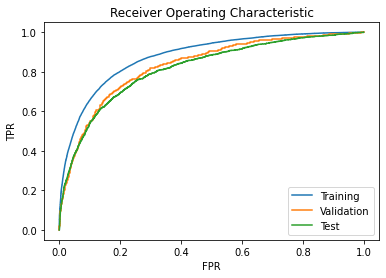

In [20]:
y_pred1 = model.predict(X_train_sm)
fpr1 , tpr1, thresholds1 = roc_curve(y_train_sm,y_pred1)

y_pred2 = model.predict(X_valid)
fpr2 , tpr2, thresholds2 = roc_curve(y_valid, y_pred2)

y_pred3 = model.predict(X_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred3)

plt.plot(fpr1, tpr1, label= "Training")
plt.plot(fpr2, tpr2, label= "Validation")
plt.plot(fpr3, tpr3, label= "Test")
plt.legend()
plt.title('Receiver Operating Characteristic')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()